In [11]:
import pandas as pd
import numpy as np
import os

In [13]:
file = "data/questions.csv"
df = pd.read_csv(file)
df.head()

,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
0,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NaN,NaN,NaN,2019-08-13 15:09:06,2019-07-08 00:00:00
1,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NaN,NaN,NaN,2019-08-13 15:09:14,NaN
2,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NaN
3,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NaN
4,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NaN,NaN,NaN,2019-08-13 15:09:20,NaN


In [29]:
begin = pd.to_datetime(df["AskedOnUtc"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
end = pd.to_datetime(df["TakenOnUtc"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [66]:
df["ResolveTime"]=end-begin
temp_df = df.dropna(subset=['ResolveTime'])
temp_df["ResolveTime"] = temp_df["ResolveTime"].dt.total_seconds().div(60).astype(int)
temp_df=temp_df.sample(frac=0.1)

/var/folders/dm/pw3svkqj0x778b5wwmm26wnr0000gn/T/ipykernel_54128/1498598099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["ResolveTime"] = temp_df["ResolveTime"].dt.total_seconds().div(60).astype(int)


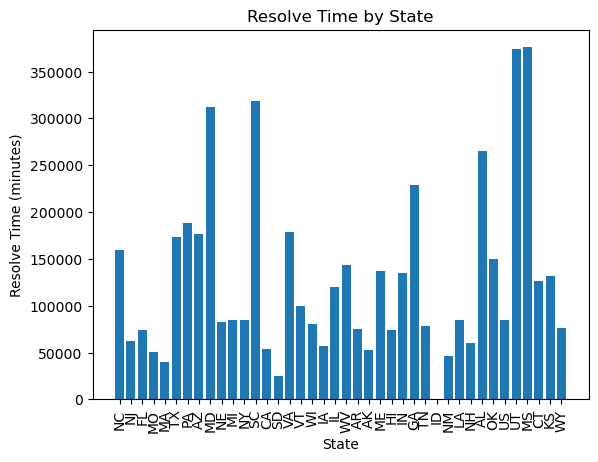

In [44]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Set the X-axis and Y-axis data
x = df["StateAbbr"]
y = df["ResolveTime"]

# Create the bar plot
ax.bar(x, y)

# Set the chart title and axis labels
ax.set_title("Resolve Time by State")
ax.set_xlabel("State")
ax.set_ylabel("Resolve Time")

# Rotate the X-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()